### Importing Dependencies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [52]:
#Setting Column Names
df = pd.read_csv("abalone.data")
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [53]:
df = df.set_axis(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'], axis=1, inplace=False)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [54]:
columns_names = list(df.columns)
columns_names

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

#### Target Column - Rings

### Exploratory Data Analysis

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [56]:
## Object type - 01 - Sex[M,F,I]
## Numerical Type - 08

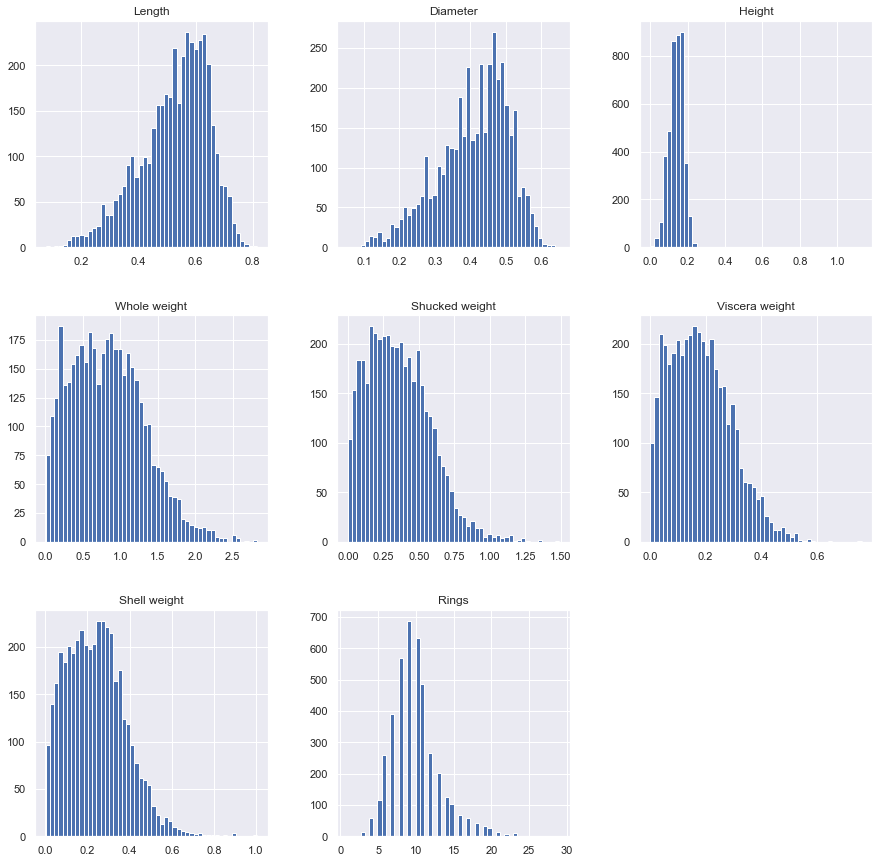

In [57]:
df.hist(bins=50,figsize=(15,15))
plt.show()

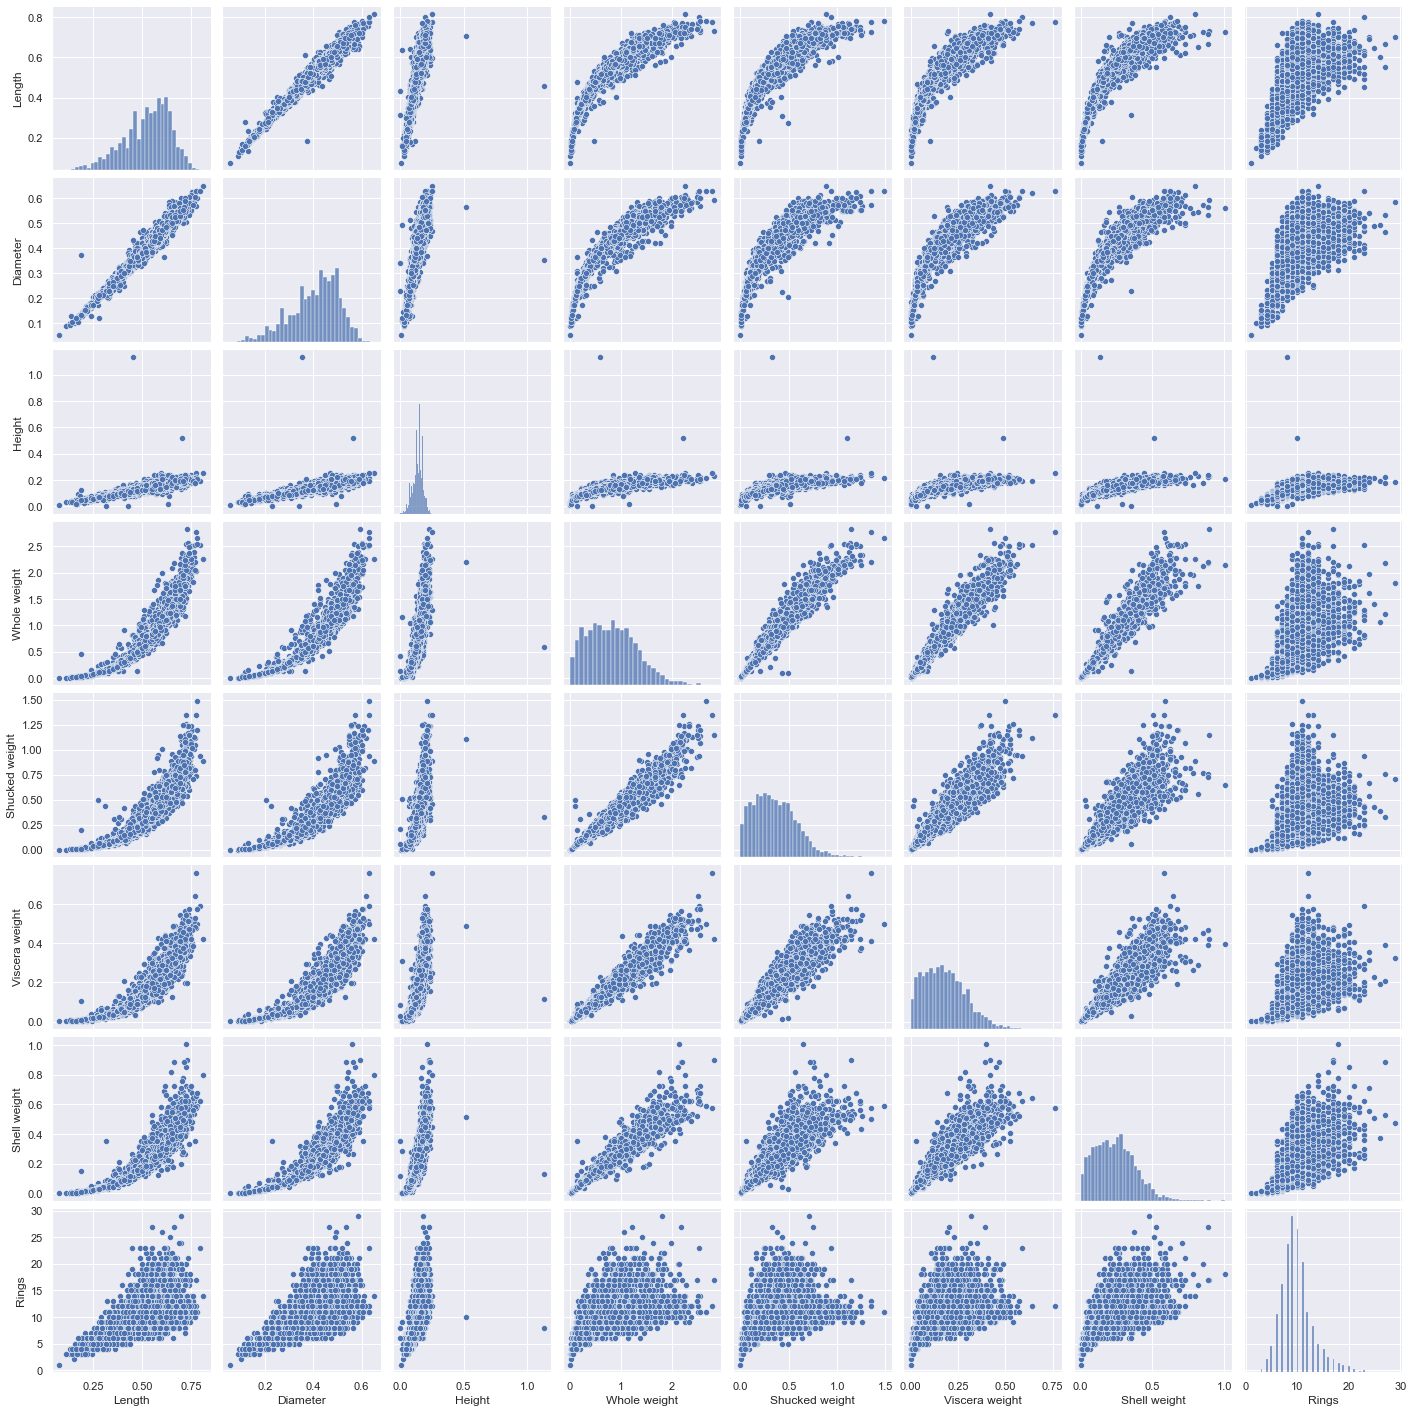

In [58]:
sns.pairplot(df)
plt.show()

<AxesSubplot: >

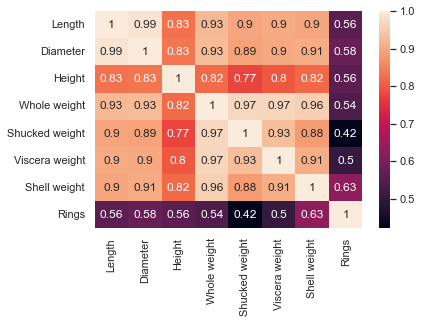

In [59]:
# plt.figure(figsize=(8,8))
corrmat = df.corr()
sns.heatmap(corrmat,annot=True)

In [60]:
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [61]:
## Dropping Columns with Correlation > 90%
df.drop(['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight'],axis=1,inplace=True)

<AxesSubplot: >

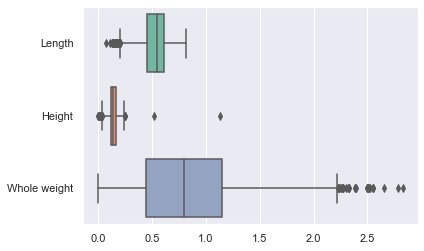

In [62]:
sns.boxplot(data=df.iloc[:,:-1],orient='h',palette="Set2")

In [63]:
df.describe()

,Length,Height,Whole weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.139527,0.828818,9.932471
std,0.120103,0.041826,0.490424,3.223601
min,0.075000,0.000000,0.002000,1.000000
25%,0.450000,0.115000,0.441500,8.000000
50%,0.545000,0.140000,0.799750,9.000000
75%,0.615000,0.165000,1.153250,11.000000
max,0.815000,1.130000,2.825500,29.000000


In [64]:
## Minimum value is "Height" feature is zero which is not possible - We need to handle this

In [65]:
df[df["Height"]==0]

,Sex,Length,Height,Whole weight,Rings
1256,I,0.430,0.0,0.428,8
3995,I,0.315,0.0,0.134,6


In [66]:
#Handling Zeroes in height
Mean = df[df["Sex"]=='I']["Height"].mean()

df.loc[df["Height"]==0,"Height"] = Mean

In [67]:
## Another method to get the mean value - pivot table
means = pd.pivot_table(df, index=['Sex'], aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.108156
M,0.151418


In [68]:
df.describe()

,Length,Height,Whole weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.139579,0.828818,9.932471
std,0.120103,0.041720,0.490424,3.223601
min,0.075000,0.010000,0.002000,1.000000
25%,0.450000,0.115000,0.441500,8.000000
50%,0.545000,0.140000,0.799750,9.000000
75%,0.615000,0.165000,1.153250,11.000000
max,0.815000,1.130000,2.825500,29.000000


## Checking for Target Class Imbalance

In [69]:
df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    102
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [70]:
#Surely there is imbalance in the Data and As it is a multiclass problem, It is difficult to balance the data
#Note - there is no 28 between 27 and 29

### Feature and Target Selection

In [71]:
X = df.drop('Rings',axis=1)
y = df['Rings']

In [72]:
# X_columns = X.columns
# X_columns

### Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
x_train.shape

(2923, 4)

## Creating Pipelines

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [76]:
numeric_features = X.select_dtypes(exclude='object').columns
numeric_features

Index(['Length', 'Height', 'Whole weight'], dtype='object')

In [77]:
categorical_features = X.select_dtypes('object').columns
categorical_features

Index(['Sex'], dtype='object')

In [78]:
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder())

In [79]:
preprocesssor = make_column_transformer((numeric_transformer,numeric_features),
                                     (categorical_transformer,categorical_features))

#### Main Pipeline

In [80]:
clf = make_pipeline(preprocesssor,DecisionTreeClassifier(max_depth=3, random_state=42))

In [81]:
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Height', 'Whole weight'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex'], dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [82]:
clf.fit(x_train,y_train)
print('Model Score: %0.3f' %clf.score(x_test,y_test))

Model Score: 0.268


### Model Predictions

In [83]:
y_pred = clf.predict(x_test)

### Evaluation

In [84]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   2   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   5  13   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   5  23   0  10   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   2  18   0  54   9   3   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   5   0  60  25  16   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   2   0  35  50  80   9   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   1   0  18  38 104  31   8   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   1   0  15  20  76  63  16   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  12  15  54  3

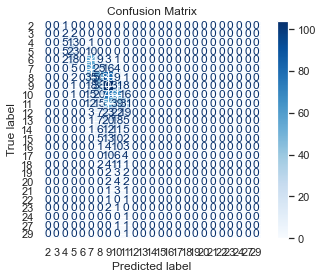

In [85]:
#Visualizing Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

# plt.figure(figsize=(20,20))
plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [86]:
## Classification Report

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification Report \n")
print(cr)

Classification Report 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.33      0.26      0.29        19
           5       0.35      0.61      0.45        38
           6       0.00      0.00      0.00        87
           7       0.29      0.55      0.37       110
           8       0.27      0.28      0.28       177
           9       0.24      0.52      0.33       200
          10       0.26      0.33      0.29       191
          11       0.30      0.21      0.24       151
          12       0.00      0.00      0.00        74
          13       0.00      0.00      0.00        51
          14       0.00      0.00      0.00        35
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        18
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00        18
   

## Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10)
print("Accuracy of each Fold ", list(accuracy*100))
print(f"Mean Accuracy {accuracy.mean()*100} %")

Accuracy of each Fold  [26.27986348122867, 27.303754266211605, 23.549488054607508, 23.972602739726025, 24.315068493150687, 25.34246575342466, 23.972602739726025, 24.65753424657534, 22.602739726027394, 26.027397260273972]
Mean Accuracy 24.802351676095185 %


## Visualizing the Decision Tree

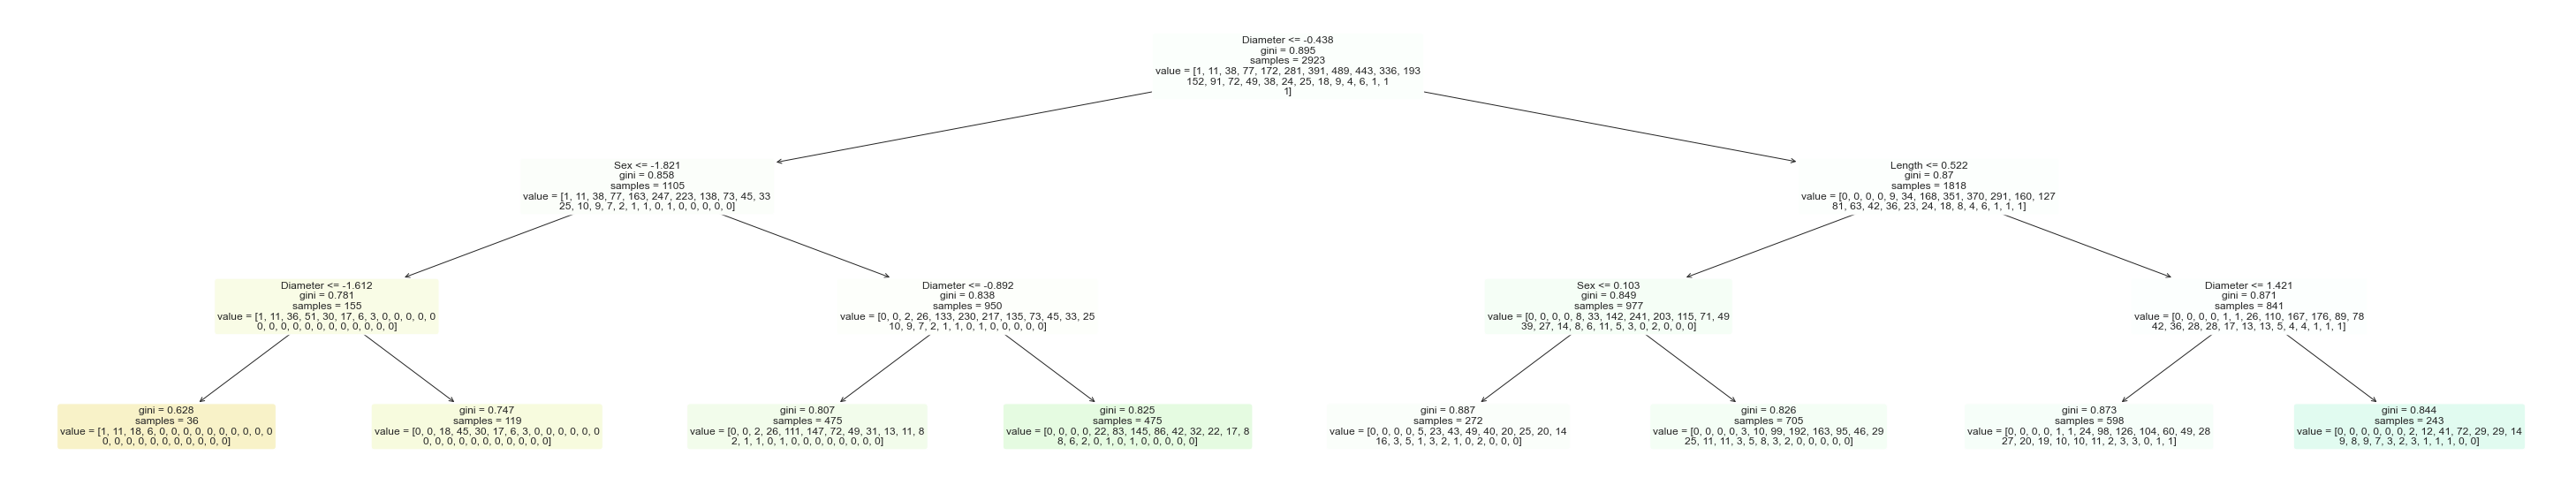

In [88]:
from sklearn import tree

plt.figure(figsize=(52,10), facecolor='w')

#Tree Plot
t = tree.plot_tree(clf[1],
                  feature_names=columns_names,
                  rounded=True,
                  filled=True,
                  fontsize=12)

plt.show()

### Finding Best Parameters using GridSearchCV

In [89]:
x_train_new = preprocesssor.fit_transform(x_train)
x_test = preprocesssor.fit_transform(x_test)

In [90]:
from sklearn.model_selection import GridSearchCV
grid = [{'max_depth' : [2,3,4,5,6,7,8,9,10],
         'min_samples_split' : [2,4,6,8,10]
        }]

clf_CV = GridSearchCV(DecisionTreeClassifier(),
                      param_grid=grid,
                      scoring ='recall_macro' )

clf_CV.fit(x_train_new,y_train)

print("Best Parameters : \n")
print(clf_CV.best_params_)

Best Parameters : 

{'max_depth': 6, 'min_samples_split': 10}


### Update the Model 

In [91]:
print(x_train_new.shape)
print(x_test.shape)

(2923, 6)
(1253, 6)


In [94]:
clf2 = DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)

In [95]:
clf2.fit(x_train_new,y_train)
print('Model Score: %0.3f' %clf2.score(x_test,y_test))

Model Score: 0.255


#####  We see  No Significant Improvement in Model Performance

### Using SMOTE/RandomOverSampling

In [96]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [97]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_ros, y_train_ros = ros.fit_resample(x_train_new,y_train)

#### SMOTE

In [ ]:
# sm = SMOTE(random_state=42,k_neighbors=1)
# x_train_res,y_train_res = sm.fit_resample(x_train_new,y_train)

In [ ]:
# pipe = make_pipeline(SMOTE(), LogisticRegression())
# weights = [0.005,0.25,100]

# gsc = GridSearchCV(estimator=pipe,param_grid={'SMOTE_ratio':weights},scoring='f1',cv=3)
# grid_result = gsc.fit(x_train_new,y_train)

# print("Best Parameter: %s"%grid_result.best_params_)

# weight_f1_score_df = pd.DataFrame({
#     'score': grid.cv_results_['mean_test_score'],
#     'weight':weights
# })

# weight_f1_score_df.plot(x='weight')

#### Cant use SMOTE as there are few records with only one instance.
#### SMOTE require at least 2 instances i.e. at least One neighbour for each record.

### Trying Out Algorithms

In [98]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(x_train_ros, y_train_ros)
    training_score = cross_val_score(classifier, x_train_ros, y_train_ros, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
   

Classifiers:  LogisticRegression Has a training score of 34.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 79.0 % accuracy score
Classifiers:  SVC Has a training score of 44.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


#### Prediction

In [104]:
y_pred_logistic = classifiers["LogisiticRegression"].predict(x_test)
y_pred_KNearest = classifiers["KNearest"].predict(x_test)
y_pred_svc = classifiers["Support Vector Classifier"].predict(x_test)
y_pred_dtree = classifiers["DecisionTreeClassifier"].predict(x_test)

#### Evaluation

In [99]:
from sklearn.metrics import mean_absolute_percentage_error, f1_score

In [107]:
# Mean Absolute Percentage Error
print("MAPE for Logistic Regression : ", mean_absolute_percentage_error(y_test,y_pred_logistic))
print("F1 score for KNN :",f1_score(y_test,y_pred_KNearest, average='micro'))
print("F1 score for SVC :",f1_score(y_test,y_pred_svc, average='micro'))
print("F1 score for Decision Tree :",f1_score(y_test,y_pred_dtree, average='micro'))

MAPE for Logistic Regression :  0.4686374627212482
F1 score for KNN : 0.14684756584197925
F1 score for SVC : 0.17238627294493217
F1 score for Decision Tree : 0.1636073423782921


### Note

1. Try Doing Random OverSampling before the Standardization